In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows
pd.options.display.max_columns=30

In [2]:
dataFrame = pd.read_csv('/home/karthik/Documents/Dataset/Automobile_data.csv')
data = dataFrame.copy()
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data['normalized-losses'].replace('?', np.nan, inplace=True)

In [4]:
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')

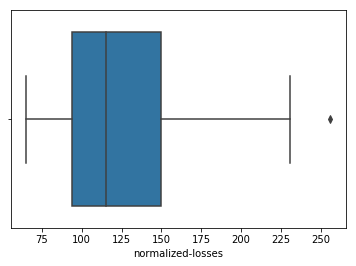

In [5]:
sns.boxplot(x=data["normalized-losses"])

In [6]:
data['normalized-losses'].fillna((data['normalized-losses'].mean()), inplace=True)

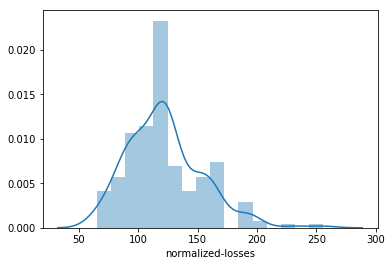

In [7]:
sns.distplot(data['normalized-losses'])

In [8]:
data['make'].nunique()

22

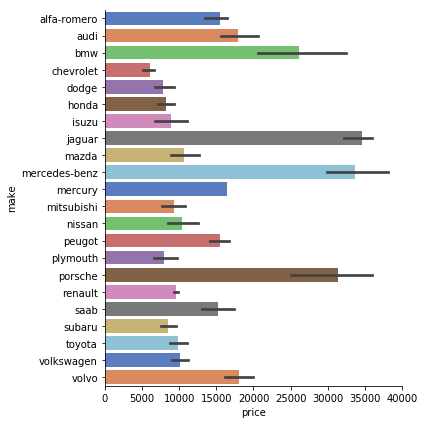

In [9]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
sns.catplot(x="price", y="make", data=data,
                height=6, kind="bar", palette="muted")

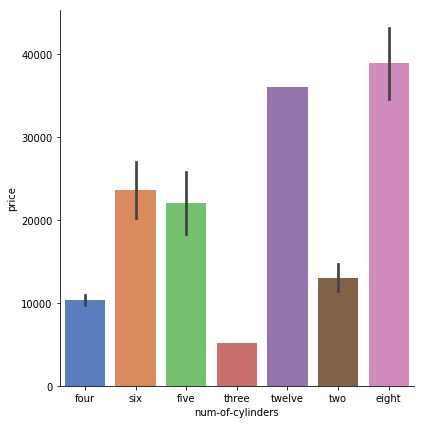

In [10]:
sns.catplot(x="num-of-cylinders", y="price", data=data,
                height=6, kind="bar", palette="muted")

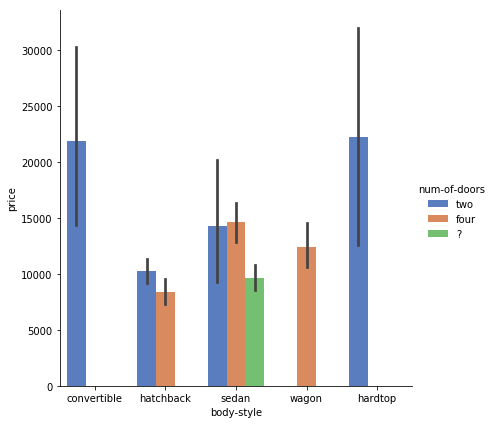

In [11]:
sns.catplot(x="body-style", y="price", hue="num-of-doors", data=data,
                height=6, kind="bar", palette="muted")

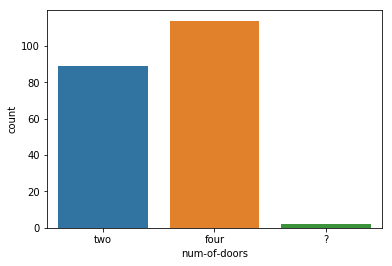

In [12]:
sns.countplot(x="num-of-doors", data=data)

In [13]:
data['num-of-doors'].replace('?', "four", inplace=True)

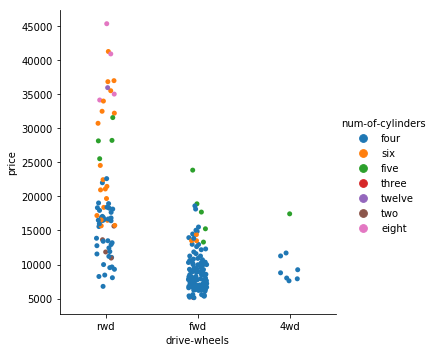

In [14]:
sns.catplot(x="drive-wheels", y="price", hue="num-of-cylinders",  data=data)

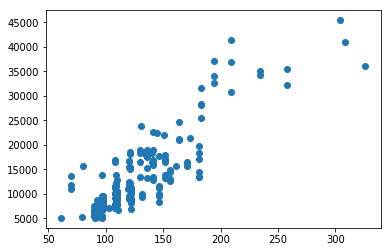

In [15]:
plt.scatter(data['engine-size'],data['price'])

In [16]:
data['horsepower'].replace('?', np.nan, inplace=True)

In [17]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

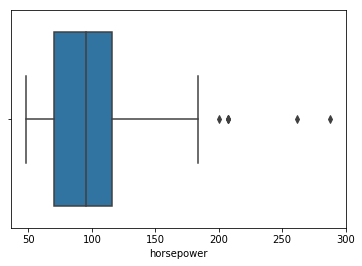

In [18]:
sns.boxplot(x=data["horsepower"])

In [19]:
data['horsepower'].fillna((data['horsepower'].mean()), inplace=True)

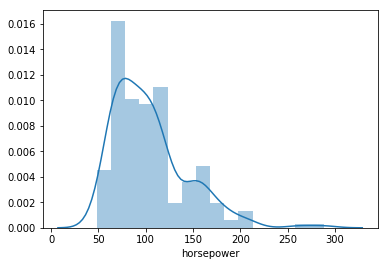

In [20]:
sns.distplot(data['horsepower'])

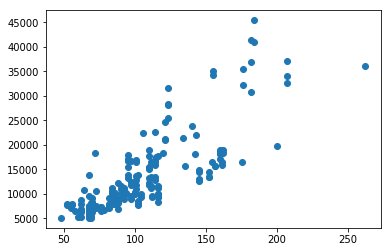

In [21]:
plt.scatter(data['horsepower'],data['price'])

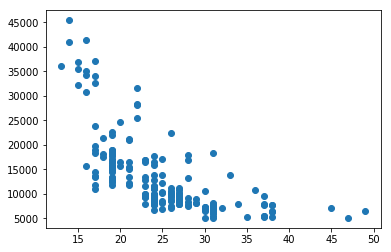

In [22]:
plt.scatter(data['city-mpg'],data['price'])

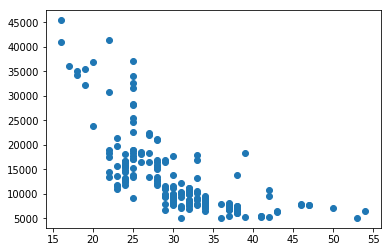

In [23]:
plt.scatter(data['highway-mpg'],data['price'])

In [24]:
data['peak-rpm'].replace('?', np.nan, inplace=True)

In [25]:
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce')

In [26]:
data['peak-rpm'].unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
         nan, 5250., 4900., 4400., 6600., 5300.])

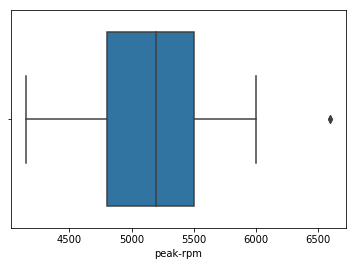

In [27]:
sns.boxplot(x=data['peak-rpm'])

In [28]:
data['peak-rpm'].fillna((data['peak-rpm'].mean()), inplace=True)

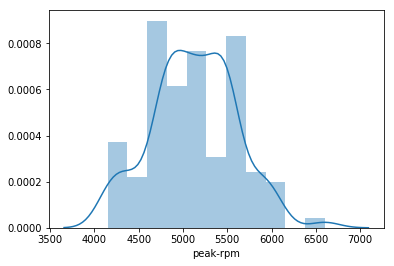

In [29]:
sns.distplot(data['peak-rpm'])

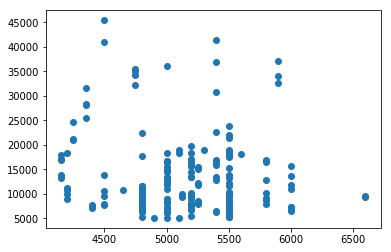

In [30]:
plt.scatter(data['peak-rpm'],data['price'])

In [31]:
data['price'].replace('nan', np.nan, inplace=True)

In [32]:
data = data.dropna()

In [33]:
data['price'].isna().sum()

0

## Below are the three feature probably dependent
#### Horsepower, CityMpG, HighwayMpG

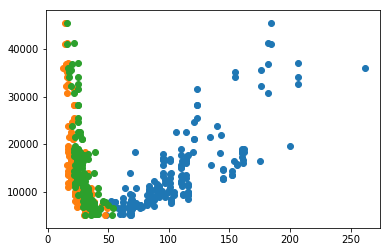

In [34]:
plt.scatter(data['horsepower'],data['price'])
plt.scatter(data['city-mpg'],data['price'])
plt.scatter(data['highway-mpg'],data['price'])

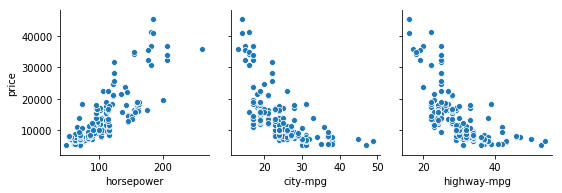

In [35]:
sns.pairplot(data, x_vars=["horsepower", "city-mpg", "highway-mpg"], y_vars=["price"])

In [39]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.iloc[:, 21:22].values
y = data.iloc[:, 25].values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

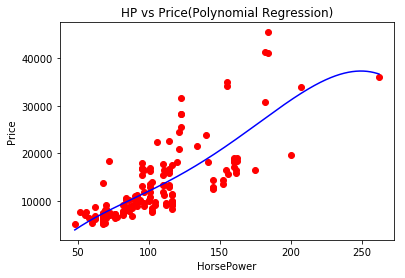

In [42]:
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('HP vs Price(Polynomial Regression)')
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show()

In [43]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

MSE =  14225609.116360966
R2 =  0.8122534733937337
